## 08-3 강력한 정규 표현식의 세계로

이제 07-2에서 배우지 않은 몇몇 메타 문자의 의미를 살펴보고 그룹(Group)을 만드는 법, 전방 탐색 등 더욱 강력한 정규 표현식에 대해서 살펴보자.

### 메타문자
아직 살펴보지 않은 메타 문자에 대해서 모두 살펴보자. 여기에서 다룰 메타 문자는 앞에서 살펴본 메타 문자와 성격이 조금 다르다. 앞에서 살펴본 +, *, [], {} 등의 메타문자는 매치가 진행될 때 현재 매치되고 있는 문자열의 위치가 변경된다(보통 소비된다고 표현한다). 하지만 이와 달리 문자열을 소비시키지 않는 메타 문자도 있다. 이번에는 이런 문자열 소비가 없는(zerowidth assertions) 메타 문자에 대해 살펴보자.

#### |  
>| 메타 문자는 or과 동일한 의미로 사용된다. A|B라는 정규식이 있다면 A 또는 B라는 의미가 된다.

In [1]:
import re

p = re.compile('Crow|Servo')
m = p.match('CrowHello')
print(m)

<re.Match object; span=(0, 4), match='Crow'>


In [3]:
print(re.search('^Life', 'Life is too short'))
print(re.search('^Life', 'My Life'))

<re.Match object; span=(0, 4), match='Life'>
None


^Life 정규식은 Life 문자열이 처음에 온 경우에는 매치하지만 처음 위치가 아닌 경우에는 매치되지 않음을 알 수 있다.



#### $  

$ 메타 문자는 ^ 메타 문자와 반대의 경우이다. 즉 $는 문자열의 끝과 매치함을 의미한다.

다음 예를 보자.

In [4]:
print(re.search('short$', 'Life is too short'))

<re.Match object; span=(12, 17), match='short'>


In [5]:
print(re.search('short$', 'Life is too short, you need python'))

None


short$ 정규식은 검색할 문자열이 short로 끝난 경우에는 매치되지만 그 이외의 경우에는 매치되지 않음을 알 수 있다.

>^ 또는 $ 문자를 메타 문자가 아닌 문자 그 자체로 매치하고 싶은 경우에는 \^, \$ 로 사용하면 된다.



#### \A  
\A는 문자열의 처음과 매치됨을 의미한다. ^ 메타 문자와 동일한 의미이지만 re.MULTILINE 옵션을 사용할 경우에는 다르게 해석된다. re.MULTILINE 옵션을 사용할 경우 ^은 각 줄의 문자열의 처음과 매치되지만 \A는 줄과 상관없이 전체 문자열의 처음하고만 매치된다.

#### \Z  
\Z는 문자열의 끝과 매치됨을 의미한다. 이것 역시 \A와 동일하게 re.MULTILINE 옵션을 사용할 경우 $ 메타 문자와는 달리 전체 문자열의 끝과 매치된다.



#### \b
\b는 단어 구분자(Word boundary)이다. 보통 단어는 whitespace에 의해 구분된다.

다음 예를 보자.

In [6]:
p = re.compile(r'\bclass\b')
print(p.search('no class at all'))

<re.Match object; span=(3, 8), match='class'>


\bclass\b 정규식은 앞뒤가 whitespace로 구분된 class라는 단어와 매치됨을 의미한다. 따라서 no class at all의 class라는 단어와 매치됨을 확인할 수 있다.

In [7]:
print(p.search('the declassified algorithm'))

None


위 예의 the declassified algorithm 문자열 안에도 class 문자열이 포함되어 있긴 하지만 whitespace로 구분된 단어가 아니므로 매치되지 않는다.

In [8]:
print(p.search('one subclass is'))

None


subclass 문자열 역시 class 앞에 sub 문자열이 더해져 있으므로 매치되지 않음을 알 수 있다.

\b 메타 문자를 사용할 때 주의해야 할 점이 있다. \b는 파이썬 리터럴 규칙에 의하면 백스페이스(BackSpace)를 의미하므로 백스페이스가 아닌 단어 구분자임을 알려 주기 위해 r'\bclass\b'처럼 Raw string임을 알려주는 기호 r을 반드시 붙여 주어야 한다.



#### \B
\B 메타 문자는 \b 메타 문자와 반대의 경우이다. 즉 whitespace로 구분된 단어가 아닌 경우에만 매치된다.

In [10]:
p = re.compile(r'\Bclass\B')
print(p.search('no class at all'))

None


In [11]:
print(p.search('the declassified algorithm'))

<re.Match object; span=(6, 11), match='class'>


In [12]:
print(p.search('one subclass is'))

None


class 단어의 앞뒤에 whitespace가 하나라도 있는 경우에는 매치가 안 되는 것을 확인할 수 있다.

### 그루핑
ABC 문자열이 계속해서 반복되는지 조사하는 정규식을 작성하고 싶다고 하자. 어떻게 해야할까? 지금까지 공부한 내용으로는 위 정규식을 작성할 수 없다. 이럴 때 필요한 것이 바로 그루핑(Grouping) 이다.

위 경우는 다음처럼 그루핑을 사용하여 작성할 수 있다.

(ABC)+
그룹을 만들어 주는 메타 문자는 바로 ( )이다.

In [16]:
p = re.compile('(ABC)+')
m = p.search('ABCABCABC OK?')
print(m)


<re.Match object; span=(0, 9), match='ABCABCABC'>


In [17]:
print(m.group())

ABCABCABC


다음 예를 보자.

In [19]:
p = re.compile(r"\w+\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")

\w+\s+\d+[-]\d+[-]\d+은 이름 + " " + 전화번호 형태의 문자열을 찾는 정규식이다. 그런데 이렇게 매치된 문자열 중에서 이름만 뽑아내고 싶다면 어떻게 해야 할까?

보통 반복되는 문자열을 찾을 때 그룹을 사용하는데, 그룹을 사용하는 보다 큰 이유는 위에서 볼 수 있듯이 매치된 문자열 중에서 특정 부분의 문자열만 뽑아내기 위해서인 경우가 더 많다.

위 예에서 만약 "이름" 부분만 뽑아내려 한다면 다음과 같이 할 수 있다.

In [21]:
p = re.compile(r"(\w+)\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")
print(m.group(1))

park


이름에 해당하는 \w+ 부분을 그룹 (\w+)으로 만들면 match 객체의 group(인덱스) 메서드를 사용하여 그루핑된 부분의 문자열만 뽑아낼 수 있다. group 메서드의 인덱스는 다음과 같은 의미를 갖는다.

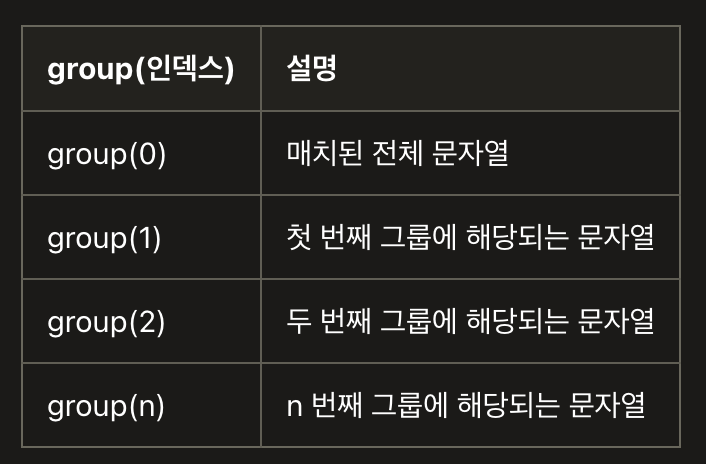

다음 예제를 계속해서 보자.

In [22]:
p = re.compile(r"(\w+)\s+(\d+[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(2))

010-1234-1234


이번에는 전화번호 부분을 추가로 그룹 (\d+[-]\d+[-]\d+)로 만들었다. 이렇게 하면 group(2)처럼 사용하여 전화번호만 뽑아낼 수 있다.

만약 전화번호 중에서 국번만 뽑아내고 싶으면 어떻게 해야 할까? 다음과 같이 국번 부분을 또 그루핑하면 된다.



In [24]:
p = re.compile(r"(\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(3))

010


위 예에서 볼 수 있듯이 (\w+)\s+((\d+)[-]\d+[-]\d+)처럼 그룹을 중첩되게 사용하는 것도 가능하다. 그룹이 중첩되어 있는 경우는 바깥쪽부터 시작하여 안쪽으로 들어갈수록 인덱스가 증가한다.

#### 그루핑된 문자열 재참조하기
그룹의 또 하나 좋은 점은 한 번 그루핑한 문자열을 재참조(Backreferences)할 수 있다는 점이다. 다음 예를 보자.

In [25]:
p = re.compile(r'(\b\w+)\s+\1')
p.search('Paris in the the spring').group()

'the the'

정규식 (\b\w+)\s+\1은 (그룹) + " " + 그룹과 동일한 단어와 매치됨을 의미한다. 이렇게 정규식을 만들게 되면 2개의 동일한 단어를 연속적으로 사용해야만 매치된다. 이것을 가능하게 해주는 것이 바로 재참조 메타 문자인 \1이다. \1은 정규식의 그룹 중 첫 번째 그룹을 가리킨다.

>두 번째 그룹을 참조하려면 \2를 사용하면 된다.

#### 그루핑된 문자열에 이름 붙이기
정규식 안에 그룹이 무척 많아진다고 가정해 보자. 예를 들어 정규식 안에 그룹이 10개 이상만 되어도 매우 혼란스러울 것이다. 거기에 더해 정규식이 수정되면서 그룹이 추가, 삭제되면 그 그룹을 인덱스로 참조한 프로그램도 모두 변경해 주어야 하는 위험도 갖게 된다.

만약 그룹을 인덱스가 아닌 이름(Named Groups)으로 참조할 수 있다면 어떨까? 그렇다면 이런 문제에서 해방되지 않을까?

이러한 이유로 정규식은 그룹을 만들 때 그룹 이름을 지정할 수 있게 했다. 그 방법은 다음과 같다.

> (?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)

위 정규식은 앞에서 본 이름과 전화번호를 추출하는 정규식이다. 기존과 달라진 부분은 다음과 같다.

>(\w+) --> (?P<name>\w+)

대단히 복잡해진 것처럼 보이지만 (\w+)라는 그룹에 name이라는 이름을 붙인 것에 불과하다. 여기에서 사용한 (?...) 표현식은 정규 표현식의 확장 구문이다. 이 확장 구문을 사용하기 시작하면 가독성이 상당히 떨어지긴 하지만 반면에 강력함을 갖게 된다.

그룹에 이름을 지어 주려면 다음과 같은 확장 구문을 사용해야 한다.

>(?P<그룹명>...)
그룹에 이름을 지정하고 참조하는 다음 예를 보자.



In [26]:
p = re.compile(r"(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group("name"))

park


위 예에서 볼 수 있듯이 name이라는 그룹 이름으로 참조할 수 있다.

그룹 이름을 사용하면 정규식 안에서 재참조하는 것도 가능하다.



In [27]:
p = re.compile(r'(?P<word>\b\w+)\s+(?P=word)')
p.search('Paris in the the spring').group()

'the the'

위 예에서 볼 수 있듯이 재참조할 때에는 (?P=그룹이름)이라는 확장 구문을 사용해야 한다.